**Let's grow More (LGMVIP)- Data Science Intern**

Author - Vaishnavi Darade

Task 1: Iris Flower Classification ML

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink Watch Tutorial from here https://youtu.be/CBCfOTePVPo  : http://archive.ics.uci.edu/ml/datasets/Iris

Importing libraries

In [19]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [20]:
df=pd.read_csv("../input/irisdataset/iris.csv")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Lable Encoding-convering the columns to numerical forms

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['Iris-setosa'])
df['Iris-setosa']= label_encoder.transform((df['Iris-setosa']))
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


Plotting the value of every x with respect to y

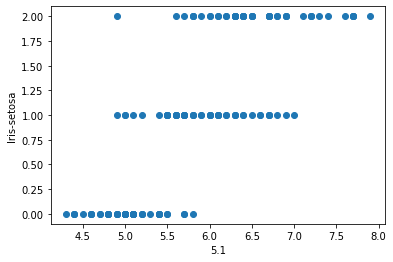

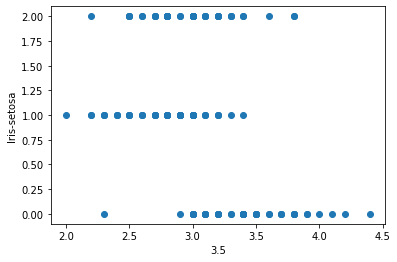

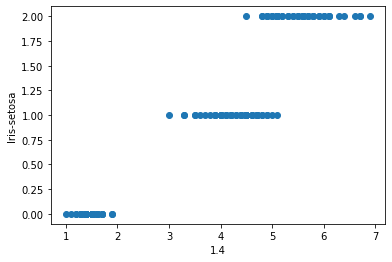

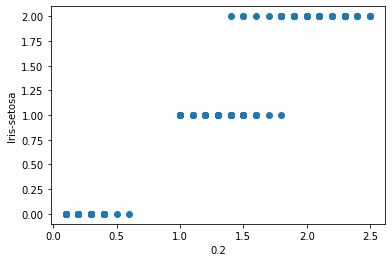

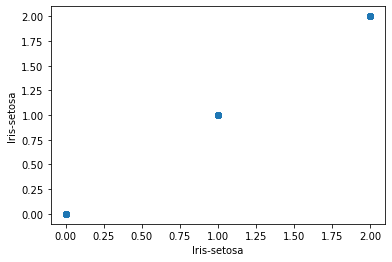

In [23]:
import matplotlib.pyplot as plt
for i in df:
    x = df[i]
    y = df['Iris-setosa']
    plt.scatter(x,y)
    plt.xlabel(i)
    plt.ylabel('Iris-setosa')
    plt.show()
    print("\n")

Heatmap

<AxesSubplot:>

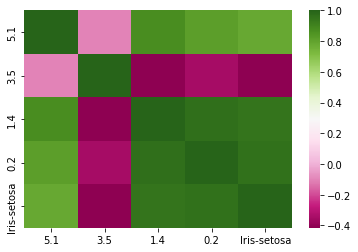

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="PiYG")

Defining the value of x and y

In [25]:
x=df.drop(['Iris-setosa'],axis=1)
y=df['Iris-setosa']

counting value of y variable

<AxesSubplot:>

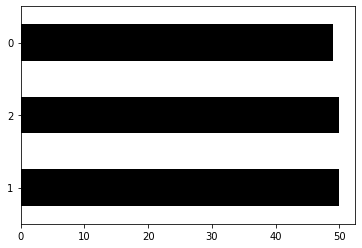

In [26]:
y.value_counts().plot(kind='barh',color='black')

Scaling the values

In [27]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mmscaler.fit(x)
x = mmscaler.transform(x)

Standardization of values

In [28]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(x)
x = sscaler.transform(x)

Train-Test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 53)

Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test,y_test_pred)
y_val=(y.unique()).astype(int)
y_val.sort()

Random forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred)*100)

90.0


Confusion Matrix for Random forest Classifier

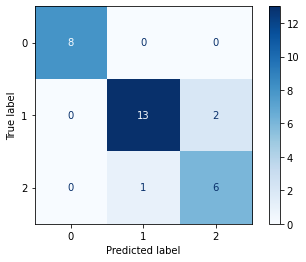

In [32]:
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
dict=plot_confusion_matrix(model,X_test,y_test,display_labels=y_val,cmap=plt.cm.Blues)
plt.show()

Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred)*100)

96.66666666666667


Confusion Matrix for Neive Bayes

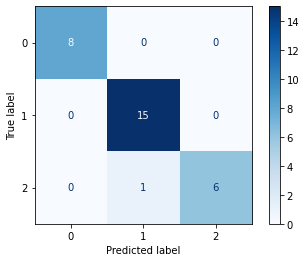

In [34]:
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
dict=plot_confusion_matrix(model,X_test,y_test,display_labels=y_val,cmap=plt.cm.Blues)
plt.show()

Defining classifier function

In [35]:
def classifier(I):
    print(I)
    I= mmscaler.transform(I)
    print(I)
    I= sscaler.transform(I)
    print(I)
    y_pred=model.predict(I)
    print(y_pred)
    y_pred=label_encoder.inverse_transform(y_pred)
    print(y_pred)

Predicting the new values

In [36]:
classifier([[5,3,1,0]])

[[5, 3, 1, 0]]
[[ 0.19444444  0.41666667  0.         -0.04166667]]
[[-1.02726211 -0.11805969 -1.58204889 -1.58866033]]
[0]
['Iris-setosa']
